<center><h1 style="color: #555555;">Experience Script Documentation</h1></center>

<div align="center">
    <table style="width: 80%; border-collapse: collapse;">
        <tr>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Context</th>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Approach</th>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Value Created</th>
        </tr>
        <tr>
            <td style="background-color: #E8F4FC; padding: 10px;">Provide the background and purpose of the script.</td>
            <td style="background-color: #E8F4FC; padding: 10px;">Describe the libraries, methods, and thought process.</td>
            <td style="background-color: #E8F4FC; padding: 10px;">Highlight the outcomes, improvements, and conclusions.</td>
        </tr>
    </table>
</div>
</html>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

dtype = {
    'MONTHLY_SPEND': float,
    'PERCENTAGE': float,
    
}

fiscal_calendar = pd.read_csv('hpo_fiscal_calendar.csv', encoding = 'UTF-8-SIG', dtype=dtype)
budget_calendar =pd.read_csv('hpo_budget_calendar.csv', encoding = 'UTF-8-SIG', dtype=dtype)

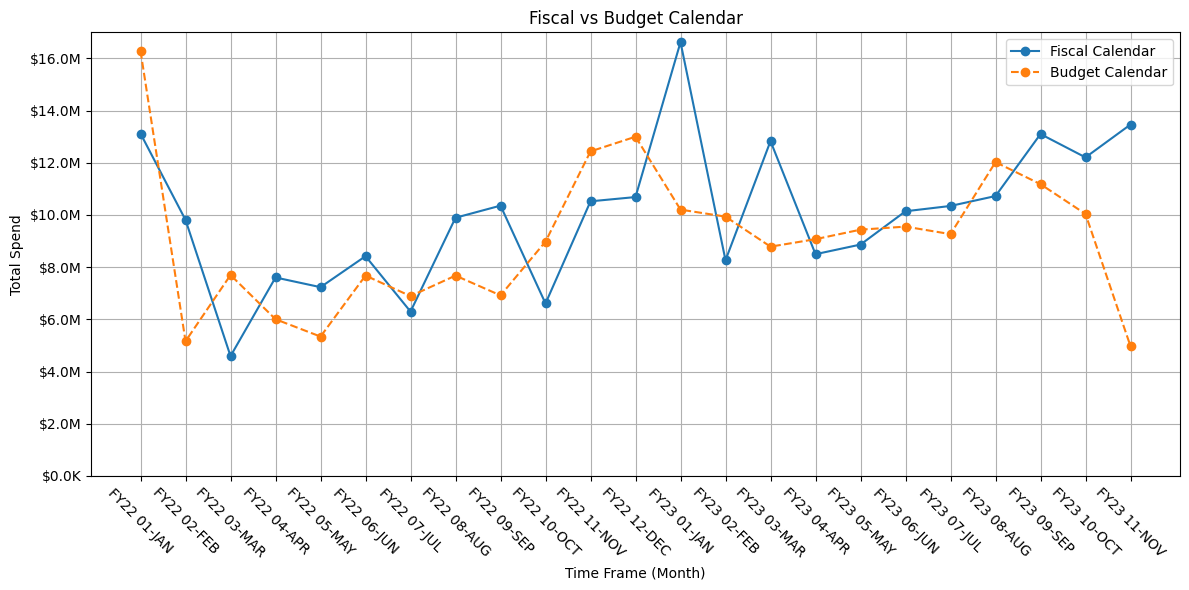

In [ ]:
# Perform an inner join on the month columns
merge_data = fiscal_calendar.merge(budget_calendar, left_on ='FISCAL_MONTH', 
                                                    right_on ='BUDGET_MONTH',
                                                    suffixes=('_fiscal', '_budget'))
# Plotting the data
plt.figure(figsize=(12,6))

# Plotting FISCAL_MONTH's PERCENTAGE
plt.plot(merge_data['FISCAL_MONTH'], merge_data['MONTHLY_SPEND_fiscal'], 
         label='Fiscal Calendar', marker='o', linestyle='-')

# Plotting BUDGET_MONTH's PERCENTAGE
plt.plot(merge_data['BUDGET_MONTH'], merge_data['MONTHLY_SPEND_budget'],
         label = 'Budget Calendar', marker = 'o', linestyle='--')

plt.xticks(rotation=-45)  # Rotate x-axis labels to the left for better readability

# Adding title and labels
plt.title('Fiscal vs Budget Calendar')
plt.xlabel('Time Frame (Month)')
plt.ylabel('Total Spend')
plt.legend()

# Format y-axis labels as 'millions' or 'thousands'
formatter = mticker.FuncFormatter(lambda x, pos: f'${x / 1e6}M' if x >= 1e6 else f'${x / 1e3}K')
plt.gca().yaxis.set_major_formatter(formatter)

# Set y-axis to range from 0 to the max value rounded to the nearest million or thousand
max_value_fiscal = merge_data['MONTHLY_SPEND_fiscal'].max()
max_value_budget = merge_data['MONTHLY_SPEND_budget'].max()
max_value = max(max_value_fiscal, max_value_budget)

if max_value >= 1e6:
    plt.ylim(0, round(max_value / 1e6) * 1e6)
else:
    plt.ylim(0, round(max_value / 1e3) * 1e3)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()